In [1]:
import sys
sys.path.append('..')
from ad_plotting import summ_plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
basal_stubby_file = "Data/spineHeadDiameter-basal-short.csv"

short_df = pd.read_csv(basal_stubby_file)

short_df.replace('Tg+', 'Tg', inplace=True)
short_df.replace('Tg-', 'WT', inplace=True)
short_df.replace('ctr', 'TAT-Cntrl', inplace=True)
short_df.replace('GluA2', 'TAT-GluA2', inplace=True)

short_df['factor'] = short_df['genotype'] + ' ' + short_df['peptide']
short_df.sort_values(['genotype', 'peptide'], ascending=[False, True], inplace=True)

In [4]:
unique_factors = short_df['factor'].unique()

basal_stubby_diameter_groups = []
basal_stubby_mean_sem_arr = np.zeros([len(unique_factors), 2])

for f_ix, f in enumerate(unique_factors):
    subdf = short_df[short_df['factor'] == f]
    vals = subdf['spineMaxHeadDiameter'].values
    mean = np.mean(vals)
    sem = stats.sem(vals)
    
    basal_stubby_diameter_groups.append(vals)
    basal_stubby_mean_sem_arr[f_ix] = [mean, sem]

In [5]:
factors = short_df.factor.unique()

data_list = [short_df[short_df.factor == f].spineMaxHeadDiameter.tolist() for f in factors]

[<Axes: xlabel='Spine diameter (µm)', ylabel='Cumulative proportion'>,
 <Axes: >]

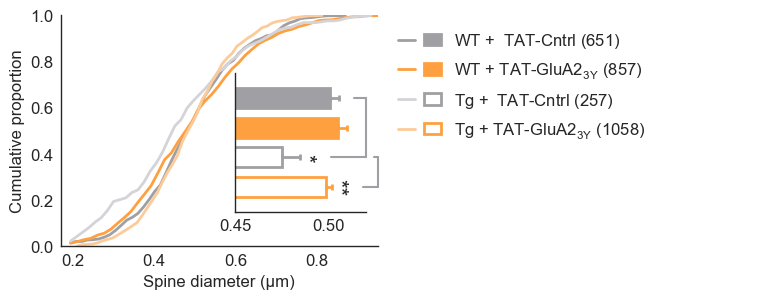

In [6]:
inset_pos = [(.55, .15), (1, .75)]

fig, ax = plt.subplots(1,2, figsize=(9,3))
ax[1].axis('off')

summ_plot([data_list], [4], label="Spine diameter (µm)", xlim=[0.17,0.95], ylim=[0.45, 0.52],
        more_wspace=.1, axes=[ax[0], inset_pos], show=False, 
        inset_style='bar', show_legend=True, show_sample_size=True, orientation="horizontal")

#plt.savefig('Fig_2f_distribution.svg', dpi=1080)